# Introduction to Machine Learning

## Defining the Problem

Machine learning is an umbrella term that includes a lot of different techniques.  At a base level, what they have in common is that an algorithm takes in a data set, learns a pattern from it, and is able to predict an output for new unseen examples.  When starting to apply machine learning to a problem, it's helpful to first understand the type of problem you're dealing with.

In [61]:
# Data stuffs
import pandas as pd
import numpy as np

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# visual stufss
import matplotlib.pyplot as plt


# decision tree visualization
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

%matplotlib inline

In [10]:
df = pd.read_csv('titanic.csv')
df = df.rename(columns = {key:key.lower() for key in df.columns})

In [11]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The titanic data set is a rite of passage when learning machine learning.  We are trying to predict whether or not a passenger survived.  The features we can use to predict survival are the passenger's class, their name, their sex, their age, the number of siblings they have on the ship, the number of parents or children they have on the ship, their ticket number, how much they paid for their ticket, their cabin number, and the port they embarked from.

### Regression vs Classification
Problems can be grouped by their output as either **regression** or **classification**.
* In regression problems, we are predicting a continuous variable. 
* In classification problems, we are predicting a categorical variable.

Is our titanic problem a regression problem or a classification problem?

### Regression Model-Linear Regression

From our infant days in algebra we learn that a linear regression for a single input attribute can be modeled as the input times the rate of change of the output over the input plus the bias. The bias is the output value when there is not input.


In [14]:
%%html
<img src='LinearRegression.png', width=700, height=700>

### Classification Model-Logistic Regression

Linear regression builds the basis of **Logistic Regression** in the sense that the weights of the explanatory variable are ajusted to produce a continous number, then this number is passed through the **sigmoid function**.


$$\phi (x, w) = \frac{1}{1 + e^{-(w_{1}x + w_{0})}}$$

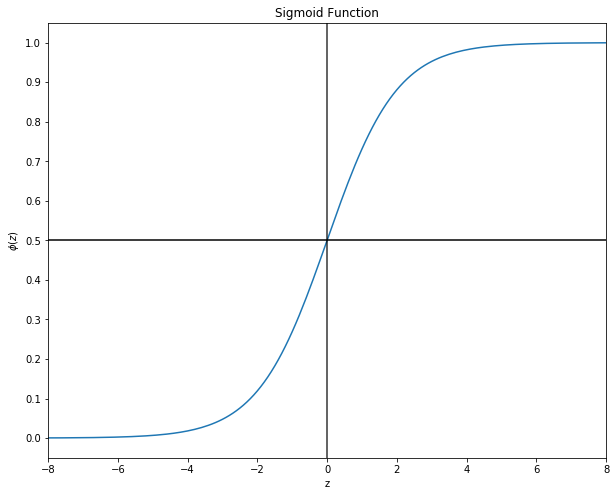

In [15]:
# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))


z = np.arange(-10, 10, 0.1)
phi = sigmoid(z)

#sigmoid visualization
fig, ax =plt.subplots(figsize=(10,8))
ax.plot(z, phi)
ax.axvline(0, c='k', alpha=0.8)
ax.axhline(0.5, c='k')
ax.set_xlim(-8, 8)
ax.set_xlabel('z')
ax.set_ylabel('$\phi(z)$')
ax.set_title('Sigmoid Function')
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()


The intersection at $\phi(0) = 0.5$ allows to create a threshold for binary classification wherre the final is:

$$\dot{y} = 
    \left\{
            \begin{array}{ll}
            1 & \mbox{if } \phi(x, w) \geq 0.5 \\
            0 & \mbox{if } otherwise
            \end{array}
         \right.$$

### Supervised vs Unsupervised
Problems can be grouped by their input as well.  Most of the examples we'll cover are supervised learning, but you may also see unsupervised or reinforcement learning.

* Supervised learning means that we have a data set that includes the labels we're trying to learn.
* Unsupervised learning means that our data set does not include labels, the algorithm is trying to find its own patterns in the data.  This usually involves transforming the data in some way.  Clustering is another example of unsupervised learning.
* Reinforcement learning includes training set ups that don't involve labels but do involve positive or negative feedback.

What type of learning are we doing on the titanic data set?

## Training a Model

Training a model is actually very straightforward in scikit learn.  First, we need to initialize our model object.  The LogisticRegression function we imported from the sciki-learn library at the beginning of the notebook.  It returns an object that we set equal to the variable model.  Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  There are a lot of arguments to this function that we can specify if we choose.  These are called **hyperparameters**, and **hyperparameter tuning** is an important topic in machine learning.  For our purposes now, the default arguments will be good, but know that you can always look at the documentation to see how you can tune a model.

In [16]:
model = LogisticRegression()

Anytime you want to make a new model in the same notebook it's important to reinitialize the model from scratch.

After we have a model, all scikit-learn models train in the same way, by using the **fit method** with the features then the labels.  

In [18]:
features = ['pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked']
model.fit(df[features], df.survived)

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Q'

## Feature Engineering
While the fit function saves us a lot of work by putting all the hard stuff under the hood, notice that we still need to do a lot of work to prepare the data for the algorithm. This is called **feature engineering** and makes up the bulk of the work we do when doing machine learning.

Most algorithms can only accept numerical inputs.  What columns can we use without any transformations?

In [19]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
for column_name in features:
    print(column_name, df[column_name].isna().sum())
# age has some nans, we'll come back to that later, for now we take it out
features = ['pclass', 'sibsp', 'parch', 'fare']

pclass 0
age 177
sibsp 0
parch 0
fare 0


In [24]:
model = LogisticRegression()
model.fit(df[features], df.survived)

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating Our Model's Success

Our model is now trained, but we trained the model on our whole data set, so now we don't have any way to evaluate whether or not we were successful.  We need to think carefully about how to design a way to test our model's success, so that we can compare between different types of models or between two models trained by separate people.

### Train / Test split

The solution to this problem is to split our data into a training set and a test set.  **This is the most important part of this lesson!**  The testing data set will be totally withheld from the training process so that we can have a sense of how our model will generalize to unseen data.  We can use scikit learn's built in function for doing the splitting.

The first argument to the function is our dataframe of features, the second argument is our label Series.  Test size is the ratio of the examples we want to be in the test set, 0.2 is a standard value.  Random state is there so other people can recreate the same split.  

In [32]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df[features], df.survived, test_size = 0.2, random_state = 33)
print('df length: ', len(df), '| train df length: ', len(train_features), '| test df length: ', len(test_features))
print(train_labels.head())
train_features.head()

df length:  891 | train df length:  712 | test df length:  179
461    0
670    1
877    0
664    1
44     1
Name: survived, dtype: int64


,pclass,sibsp,parch,fare
461,3,0,0,8.0500
670,2,1,1,39.0000
877,3,0,0,7.8958
664,3,1,0,7.9250
44,3,0,0,7.8792


In [33]:
# now we train the model on the training features and training labels
model = LogisticRegression()
model.fit(train_features, train_labels)

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We can use the predict method to make predictions on unseen data with out model.

In [34]:
model.predict([test_features.iloc[0, :]])

array([1])

In [35]:
model.predict(test_features)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0])

## Model Evaluation

After training our model on the training set, we make predictions on the test set and compare our predictions to the actual labels.  In a classification problem, we are interested in a couple metrics.  An important one is accuracy, which is simply the number of test examples we got over the total number of test examples.  We could compare the array of predictions ourselves, but scikit-learn includes some handy functions for this.

In [37]:
accuracy_score(test_labels, model.predict(test_features))

0.7039106145251397

70% accuracy, that seems pretty good for a first attempt?  

However, accuracy doesn't always tell the whole story, sometimes the **baseline accuracy** is already very high. 

What is the baseline accuracy in our titanic data set?

In [40]:
print(test_labels.value_counts())
(107)/(107+72)

0    107
1     72
Name: survived, dtype: int64


0.5977653631284916

## Feature Engineering Strikes Back

Let's take a closer look at how our features influence survival.

In [42]:
df.groupby('pclass').survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [43]:
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [44]:
df.groupby('survived').age.mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [45]:
df.groupby('sibsp').survived.mean()

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

In [46]:
df.groupby('parch').survived.mean()

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64

In [47]:
df.groupby('survived').fare.mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

Sex and Class look like very strong predictors.  At first glance, age doesn't seem useful though we can revisit this.  Siblings Present and Parents/Children are hard to parse, we may need to do additional transformations on those.

Let's try training a classifier only on class and sex to see what kind of result we get.  First, we need to transform the sex column to a binary variable.

In [52]:
# then we convert the text to a binary variable
df.sex = df.sex.map({'male':0, 'female':1}).astype(int)

In [53]:
features = ['pclass', 'sex']
train_features, test_features, train_labels, test_labels = train_test_split(
    df[features], df.survived, test_size = 0.2, random_state = 33)
model = LogisticRegression()
model.fit(train_features, train_labels)
accuracy_score(test_labels, model.predict(test_features))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7932960893854749

Just by adding a feature for sex and dropping the questionable features we got a 10 point increase in accuracy.  

We could also try using a different model.

In [55]:
features = ['pclass', 'sex']
train_features, test_features, train_labels, test_labels = train_test_split(
    df[features], df.survived, test_size = 0.2, random_state = 33)
model = DecisionTreeClassifier()
model.fit(train_features, train_labels)
accuracy_score(test_labels, model.predict(test_features))

0.7877094972067039

Your turn! Open the Titanic Example Notebook and see if you can beat our score.

## Other Evaluation Metrics: Precision, Recall, and ROC AUC

A confusion matrix breaks down exactly what kind of errors we are making.

In [59]:
predictions = model.predict(test_features)
confusion_matrix(test_labels, predictions)

array([[106,   1],
       [ 37,  35]])

In addition to accuracy, precision and recall are the two other metrics of interest in classification problems.    
https://en.wikipedia.org/wiki/Precision_and_recall

There is a trade off between precision and recall (think about why this is true).  The receiver operating characteristic (ROC) curve captures the relationship between this trade off and accuracy.  The area under this curve, or ROC AUC, is another metric for evaluating classifiers.

precision:  0.9722222222222222
recall:  0.4861111111111111


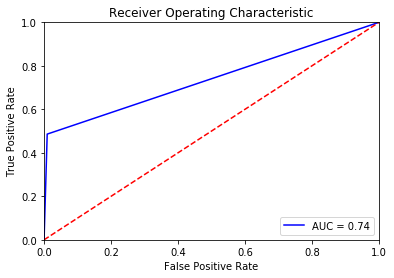

In [62]:
print('precision: ', precision_score(test_labels, predictions))
print('recall: ', recall_score(test_labels, predictions))

fpr, tpr, threshold = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Overfitting and Underfitting

## Ensemble Methods